## Hands-On Classification: A Complete Homework for Building an Effective ML Model

In the highly competitive banking industry, understanding customer behavior is crucial for designing effective marketing strategies. Banks invest heavily in marketing campaigns to promote their products and services, aiming to attract new customers and retain existing ones. One such product is a ***term deposit**, a fixed-term investment that offers higher interest rates than regular savings accounts. Convincing clients to subscribe to term deposits can significantly boost a bank's capital for lending and other investment opportunities.

Imagine you are a data scientist at a Portuguese bank. Your team is working on optimizing the bank's marketing campaigns to increase the subscription rate of term deposits. By leveraging historical data from previous campaigns, you aim to build a predictive model that can identify which clients are most likely to subscribe. This will enable the bank to target its resources more effectively, improve customer experience by tailoring communication, and ultimately enhance the return on investment for marketing efforts.

In this assignment, you will work with a real-world dataset containing information about the bank's clients, details of previous marketing activities, and whether the client eventually subscribed to a term deposit. This project offers a hands-on opportunity to apply machine learning techniques to a practical problem, illustrating how data-driven decisions can have a tangible impact on business outcomes.

*For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp

## Dataset

In this homework, you will use the Bank Marketing Dataset. You can download it from [this link](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

From the downloaded zip archive, extract only the `bank/bank-full.csv` file. Place this file in the `data` directory within the folder containing your current notebook. When reading the data, use a semicolon (`;`) as the separator, as shown below:

```python
pd.read_csv('data/bank-full.csv', sep=';')
```

**Dataset Description**

*Client Data*

1. **Age**: (numeric)
2. **Job**: Type of job (categorical)
3. **Marital**: Marital status (categorical)
4. **Education**: (categorical)
5. **Default**: Has credit in default? (categorical)
6. **Housing**: Has housing loan? (categorical)
7. **Loan**: Has personal loan? (categorical)
8. **Balance**: Balance of the individual (numeric)

*Related to the Last Contact of the Current Campaign:*

9. **Contact**: Contact communication type (categorical)
10. **Month**: Last contact month of the year (categorical)
11. **Day**: Last contact day of the week (categorical)
12. **Duration**: Last contact duration, in seconds (numeric) *(Note: This attribute should only be included for benchmark purposes and should be discarded for realistic predictive models.)*

*Current and previous Campaign Interactions:*

13. **Campaign**: Number of contacts performed during this campaign and for this client (numeric)
14. **Pdays**: Days since last contact in a previous campaign (numeric; -1 means not previously contacted)
15. **Previous**: Number of contacts performed before this campaign for this client (numeric)
16. **Poutcome**: Outcome of the previous marketing campaign (categorical)

**Output Variable (Target):**

17. **Y**: Has the client subscribed to a term deposit? (binary: 'yes', 'no')

## Rules

1. **Tasks**:  
   - The assignment consists of multiple tasks designed to be completed in the given sequential order, covering topics such as data exploration, feature engineering, classification, hyperparameter tuning, model evaluation and interpretation, and handling imbalanced datasets. Do not change the order of tasks or delete any existing instructions in the notebook.

2. **Adding Cells**:  
   - You are welcome to add additional cells between tasks for notes, experiments, or debugging as needed. Ensure the main structure of the notebook remains intact.

3. **Seeking Help**:  
   - If you have any questions about the tasks or conditions, feel free to ask for clarification in the Discord channel. Active participation is highly encouraged!

4. **Partial Submissions**:  
   - If you are unable to complete all tasks by the general homework submission deadline, partial submissions are accepted. You will receive partial grading based on the work you submit.

## Importing Libaries

In [56]:
# HERE GOES YOUR CODE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import PowerTransformer, StandardScaler

## Load Data

In [5]:
# Place the bank-full.csv dataset from downloaded archive in the 'data' directory, then load it from the specified path
# use sep=';' parameter for reading csv file with pandas - pd.read_csv(path, sep=';')

path = 'data/bank-full.csv'
df = pd.read_csv(path, sep=';')

# YOUR CODE TO LOAD THE DATA

## Data Inspection

In [6]:
# Display First 5 and last 5 rows of the dataframe to understand data structure
print("First 5 rows:")
print(df.head())

First 5 rows:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [7]:
# Display general information about the dataframe (columns type and number of non-missing values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# Generate summary statistics (mean, max, min, standard deviation...) for numerical features.
summary_stats = df.describe()

# Display the summary statistics
print(summary_stats)

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [9]:
# For each categorical column, display the unique categories along with the count of rows for each category, sorting them descendingly by count
categorical_columns = df.select_dtypes(include='object').columns  

for col in categorical_columns:
    print(f"\n{col} - Value Counts:")
    print(df[col].value_counts().sort_values(ascending=False))


job - Value Counts:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital - Value Counts:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education - Value Counts:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

default - Value Counts:
default
no     44396
yes      815
Name: count, dtype: int64

housing - Value Counts:
housing
yes    25130
no     20081
Name: count, dtype: int64

loan - Value Counts:
loan
no     37967
yes     7244
Name: count, dtype: int64

contact - Value Counts:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month - Value Counts:
month
may    13766
jul     6895
aug     6247


## Exploratory Data Analysis

Create a bar plot to visualize the distribution of examples across the prediction classes (`y=no` and `y=yes`).


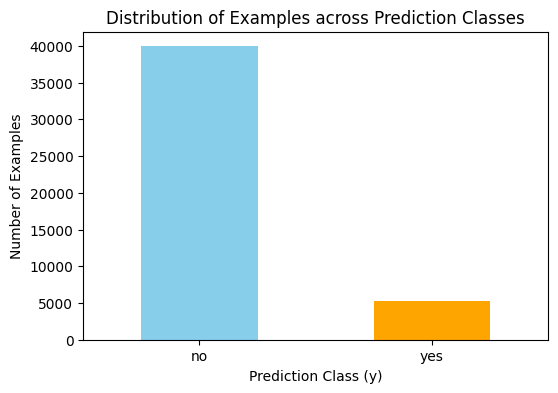

In [12]:
# YOU CODE GOES HERE
# Count the occurrences of 'yes' and 'no' in the target variable 'y'
y_counts = df['y'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
y_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Add labels and title
plt.title('Distribution of Examples across Prediction Classes')
plt.xlabel('Prediction Class (y)')
plt.ylabel('Number of Examples')
plt.xticks(rotation=0)

# Show the plot
plt.show()

Is the current dataset balanced?

In [ ]:
# YOUR ANSWER GOES HERE
no

Create a 2x4 figure to display histograms for each of the 7 numerical features


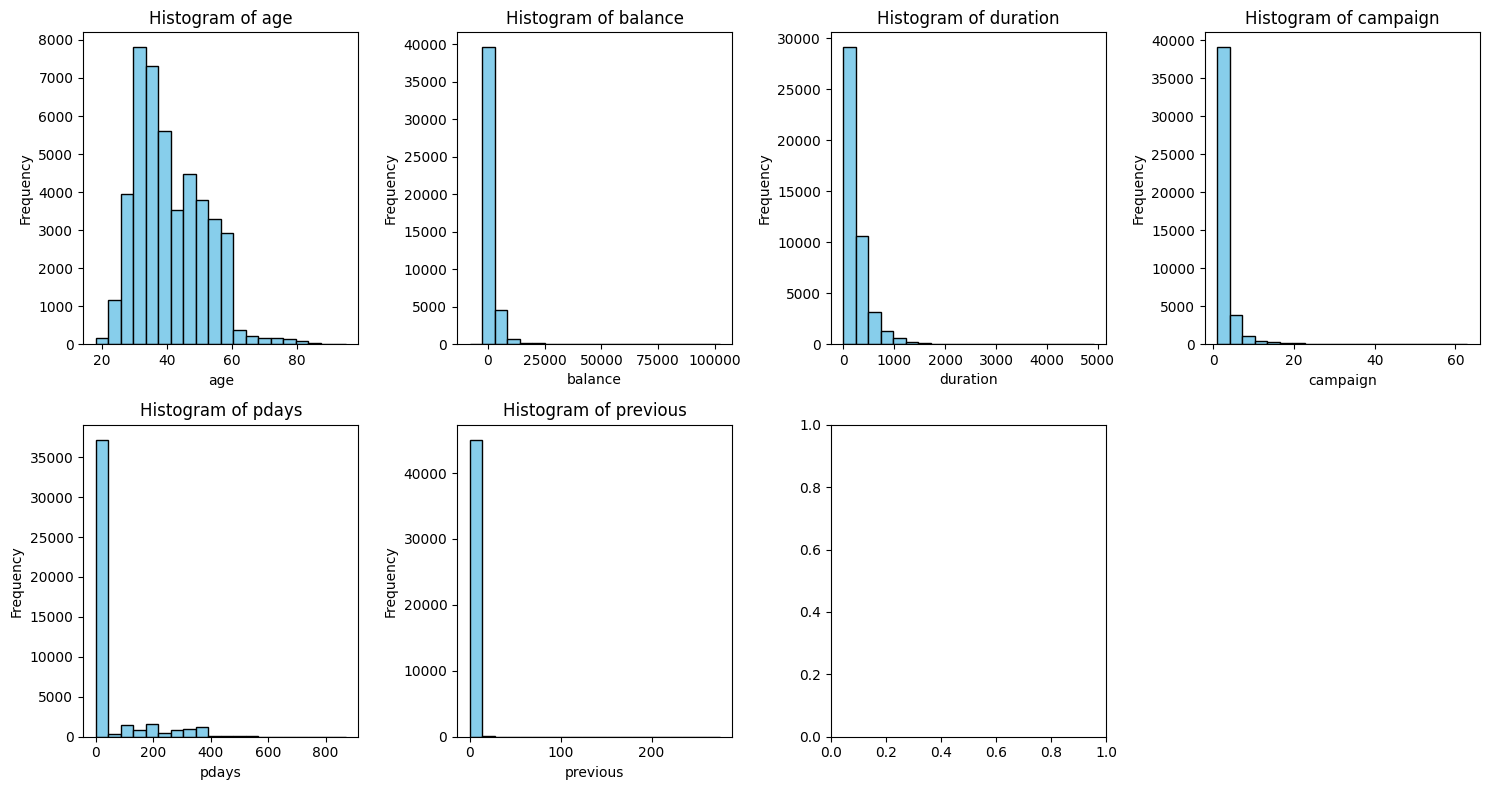

In [13]:
# YOUR CODE GOES HERE

# List of numerical columns
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Create a 2x4 figure
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Flatten the axes array to iterate over them
axes = axes.flatten()

# Loop through numerical columns and plot histograms
for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots (since we have 7 features and 8 subplots)
fig.delaxes(axes[7])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Which features exhibit a normal-like distribution?

Which features have skewed distributions?

In [14]:
# YOU ANSWER GOES HERE
skewness = df[numerical_columns].skew()

# Display skewness of each numerical feature
print(skewness)

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64


Create two separate boxplots to compare the distribution of the `age` feature for the two classes: `y = yes` and `y = no`. This will help visualize how the `age` varies across the two categories.

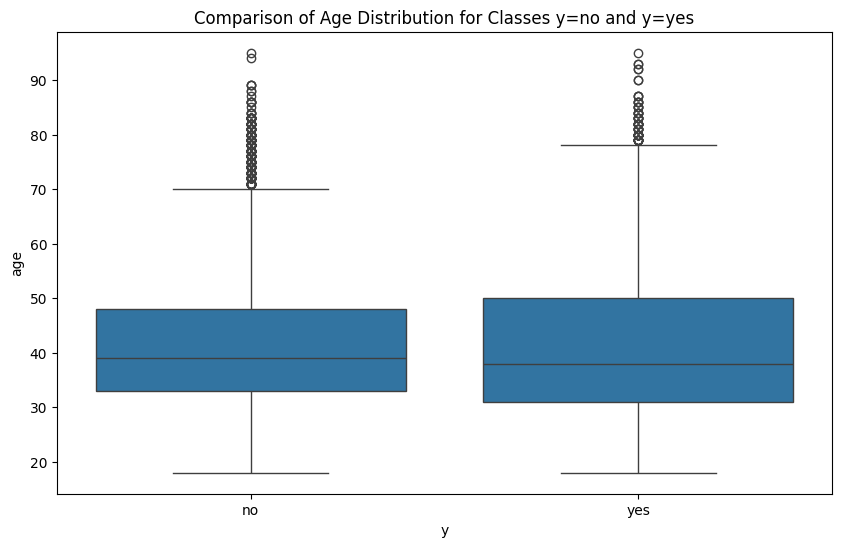

In [20]:
# YOU CODE GOES HERE
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='age')

# Display the plot
plt.title('Comparison of Age Distribution for Classes y=no and y=yes')
plt.show()

Create similar figures as above, but use the `day` and `duration` features instead of `age` to visualize how they vary across the two prediction categories (`y = yes` and `y = no`).

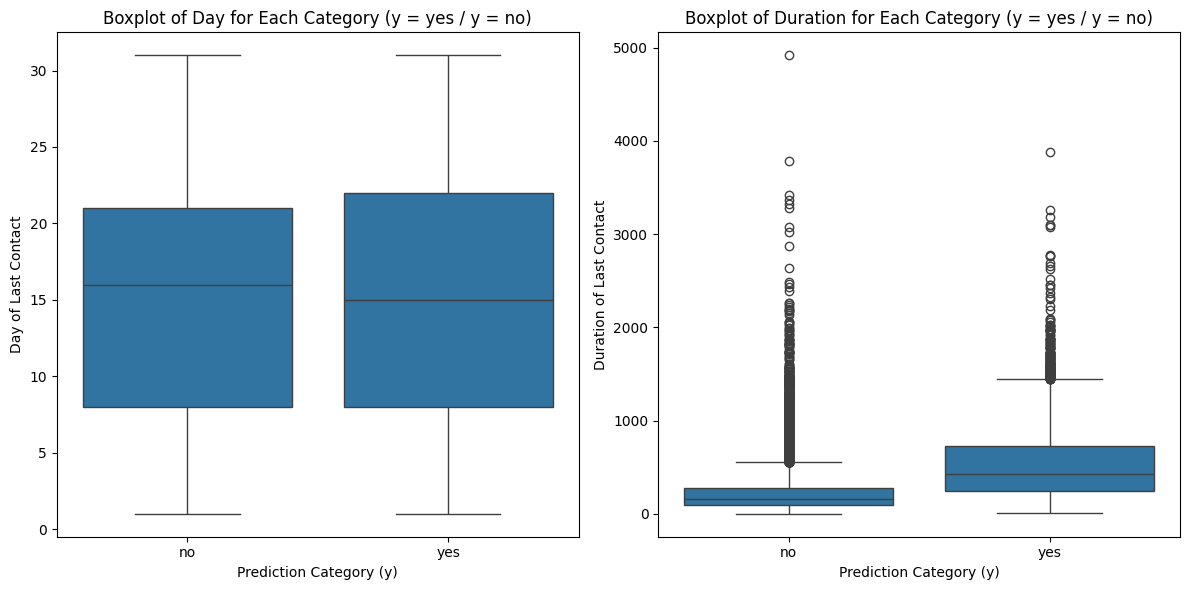

In [21]:
# YOUR CODE GOES HERE
plt.figure(figsize=(12, 6))

# Create a subplot for 'day' feature
plt.subplot(1, 2, 1)
sns.boxplot(x='y', y='day', data=df)
plt.title('Boxplot of Day for Each Category (y = yes / y = no)')
plt.xlabel('Prediction Category (y)')
plt.ylabel('Day of Last Contact')

# Create a subplot for 'duration' feature
plt.subplot(1, 2, 2)
sns.boxplot(x='y', y='duration', data=df)
plt.title('Boxplot of Duration for Each Category (y = yes / y = no)')
plt.xlabel('Prediction Category (y)')
plt.ylabel('Duration of Last Contact')

# Show the plot
plt.tight_layout()
plt.show()

Based on the created boxplots, which of inspected features show the greatest variation between the two target categories (`y = yes` and `y = no`)?

In [ ]:
# YOU ANSWER GOES HERE
yes

For each following categorical features (`job`, `marital`, `education`, `housing`, `loan`, `contact`, `month`, `poutcome`), create bar charts to visualize the number of entries in each category. Arrange the bar charts in a grid layout for better comparison and readability. Customize figure size, title and labels.

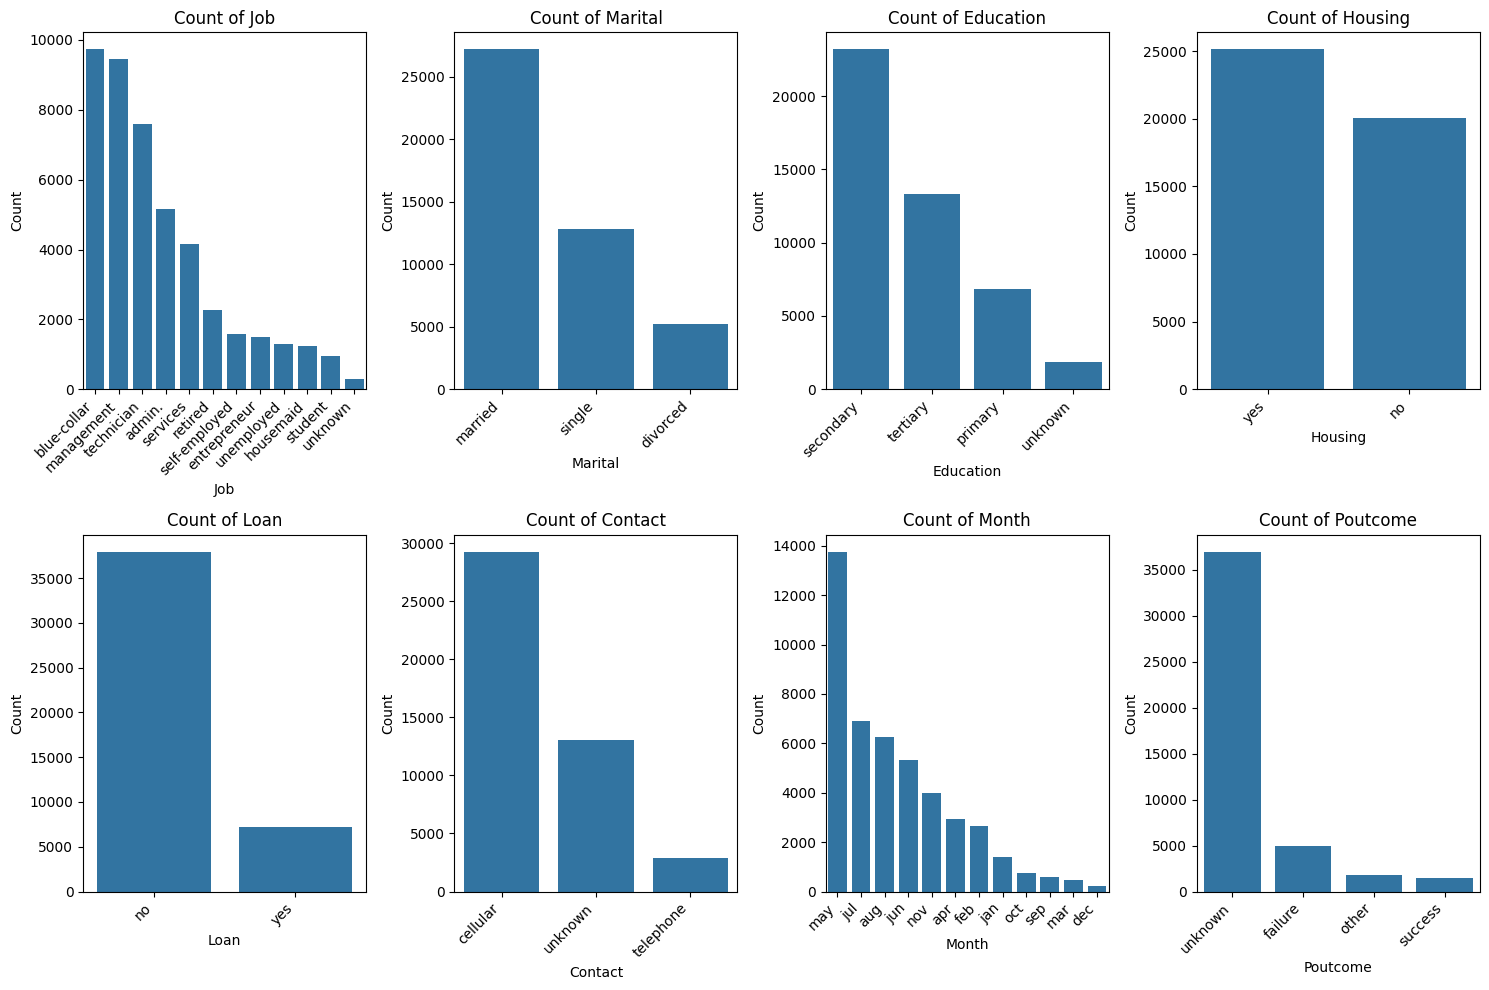

In [22]:
# YOU CODE GOES HERE
# List of categorical features to plot
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Set figure size for a grid layout (2 rows, 4 columns)
plt.figure(figsize=(15, 10))

# Loop through the categorical features and create bar charts
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)  # Creating a subplot for each feature
    sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'Count of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

Create similar bar charts as above, but split the bars within each category to show the counts for each target (y) subgroup separately (you can use `hue` param from seaborn `countplot`)

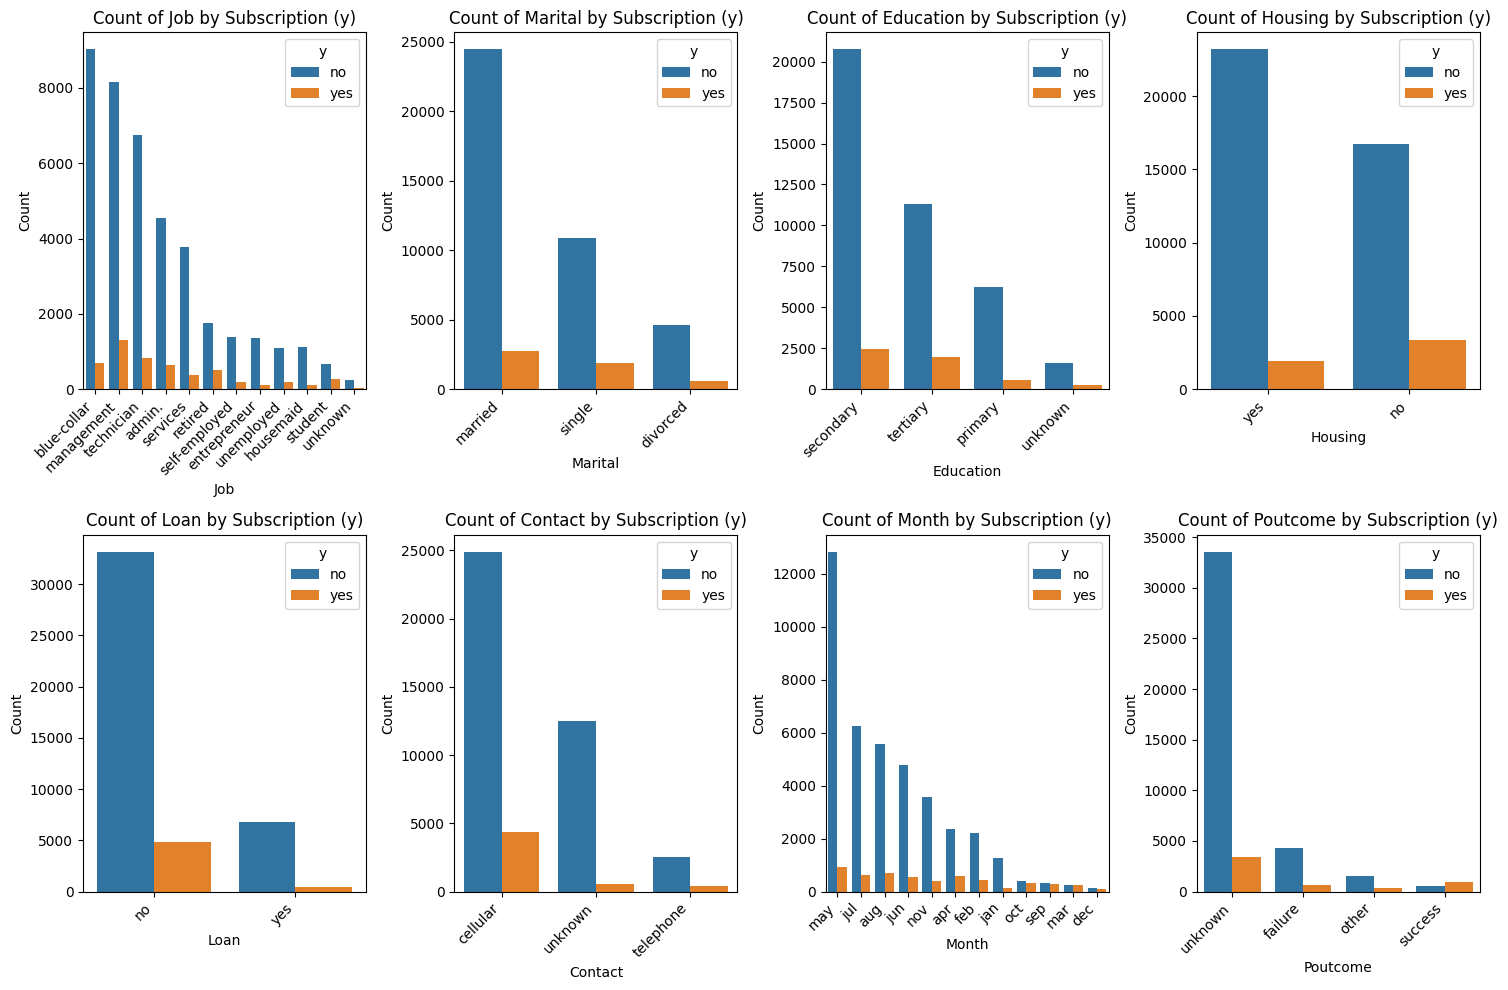

In [23]:
# YOU CODE GOES HERE
# List of categorical features to plot
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Set figure size for a grid layout (2 rows, 4 columns)
plt.figure(figsize=(15, 10))

# Loop through the categorical features and create bar charts
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)  # Creating a subplot for each feature
    sns.countplot(x=feature, data=df, hue='y', order=df[feature].value_counts().index)
    plt.title(f'Count of {feature.capitalize()} by Subscription (y)')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

Questions:

- People with which profession were more likely to accept a 'term contract' (`y = yes`)?
- How does the probability of accepting a 'term contract' differ across education levels, housing statuses, and loan statuses?

Consider creating an additional visualization to display the ratio of each target outcome (`y = yes` and `y = no`) for each category of the categorical features. This will help better understand the distribution of outcomes across different groups.

In [ ]:
# YOU ANSWERS GO HERE
management

### Correlation Heamtap

Encode the variables to prepare the dataset for a correlation heatmap: convert the binary categories in `housing`, `loan`, `default`, and `y` (`"no"` to `0`, `"yes"` to `1`) and map the `month` variable to its numerical equivalent (e.g., January = 1, December = 12). Then, construct a heatmap to visualize the correlations between the encoded variables and other numerical features in the dataset.

C:\Users\Cezar\AppData\Local\Temp\ipykernel_828\769771693.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 'yes' else 0)


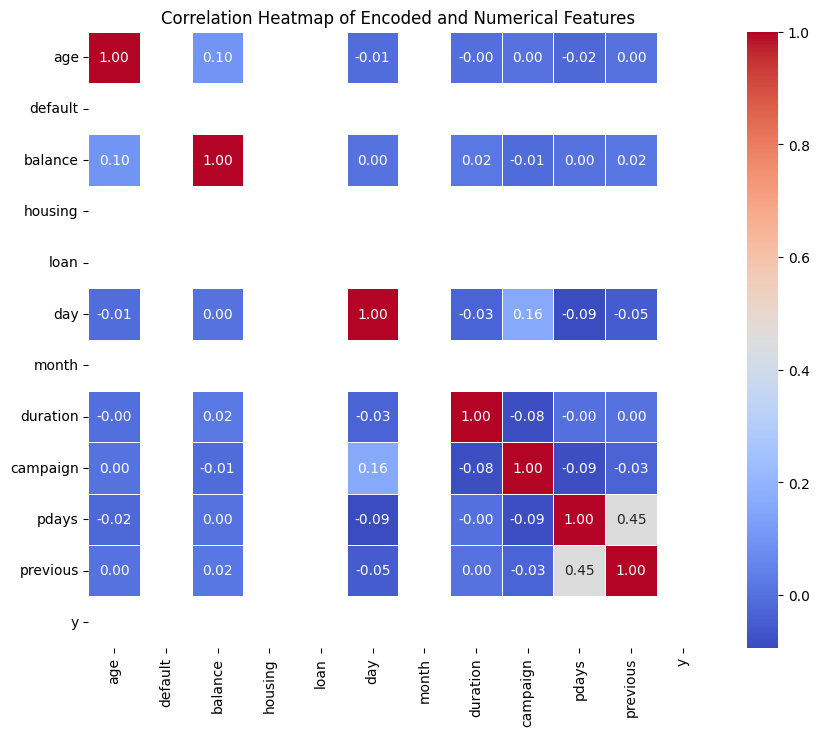

In [28]:
# YOUR CODE GOES HERE
binary_columns = ['housing', 'loan', 'default', 'y']
df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 'yes' else 0)

month_mapping = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}
df['month'] = df['month'].map(month_mapping)

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Encoded and Numerical Features')
plt.show()

In [30]:
# YOU CORRELATION MATRIX CREATION HERE, use following parameters inside heatmap function call: annot=True, fmt='.2f', cmap='coolwarm', cbar=True

What are the features with the biggest correlation?

In [ ]:
# YOU ANSWER GOES HERE

Which features have the biggest correlation with target variable?

In [ ]:
# YOUR ANSWER GOES HERE

### Mutual Information

While correlation is useful for assessing linear relationships between features, it has limitations. Correlation only captures linear dependencies and is not very informative for categorical features. In contrast, **mutual information** provides a more flexible measure of association, capturing both linear and non-linear relationships, regardless of feature types.

Calculate the mutual information between your features and target variable to gain a comprehensive view of their dependencies. You can use `mutual_info_score` from `sklearn` to achieve this.

In [44]:
numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome', 'y']

df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns=['y_yes'])  
y = df_encoded['y_yes']  

mi = mutual_info_classif(X, y)

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

print(mi_df)


                Feature  Mutual Information
3              duration            0.073664
5                 pdays            0.026846
40     poutcome_success            0.025841
1               balance            0.021350
41     poutcome_unknown            0.020586
24          housing_yes            0.016283
27      contact_unknown            0.014646
0                   age            0.014095
6              previous            0.011406
18      marital_married            0.010268
35            month_may            0.009421
20  education_secondary            0.007245
2                   day            0.006345
34            month_mar            0.005757
21   education_tertiary            0.005476
4              campaign            0.005378
37            month_oct            0.004870
7       job_blue-collar            0.004064
29            month_dec            0.003800
38            month_sep            0.003783
25             loan_yes            0.003493
16       job_unemployed         

Which features have the highest mutual information score with the target variable?

### Other Visualizations

In this section, you are encouraged to create additional visualizations that you believe could help you better understand the data, explore the relationships between features and the target variable, or uncover insights that might be useful during the feature engineering phase.

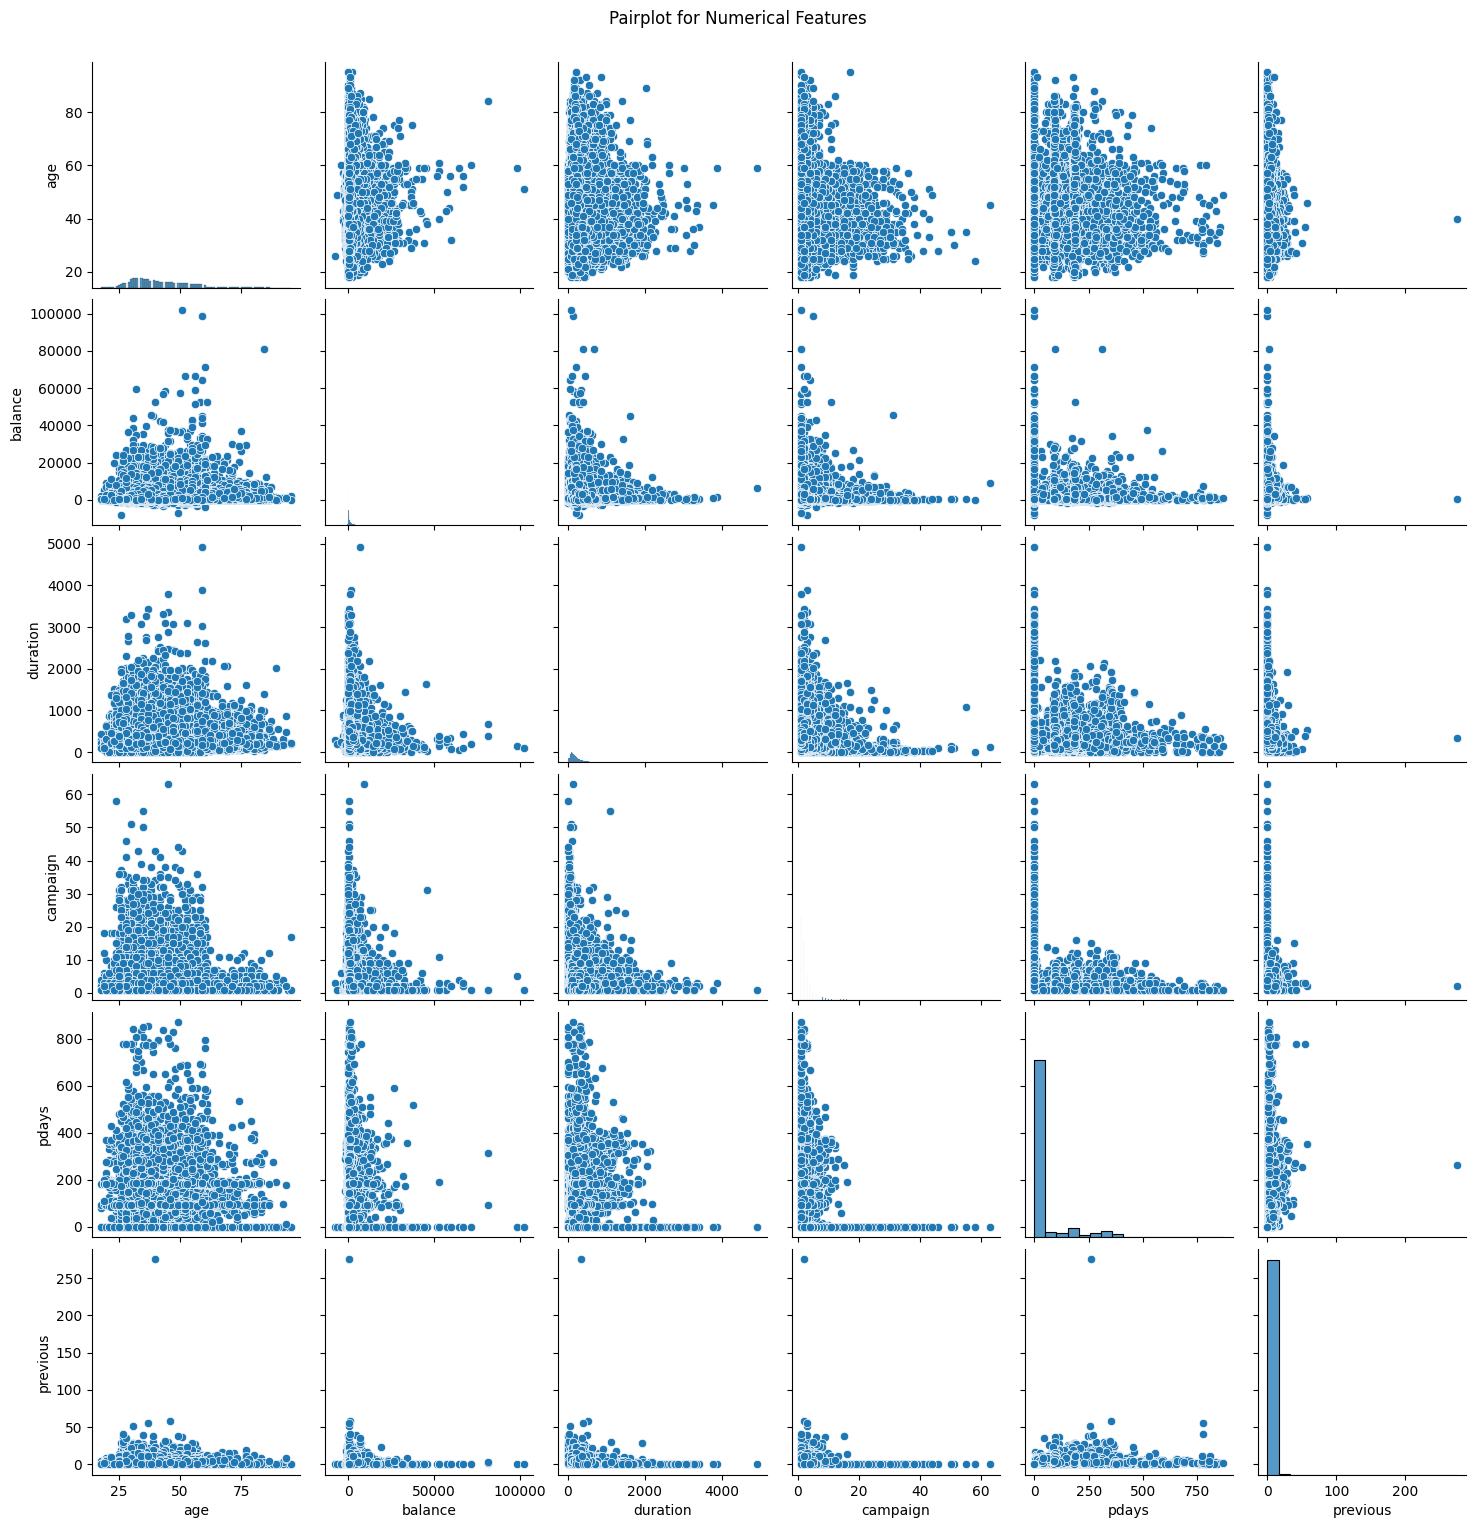

In [46]:
# YOUR CODE GOES HERE
num_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
sns.pairplot(df[num_features])
plt.suptitle("Pairplot for Numerical Features", y=1.02)
plt.show()

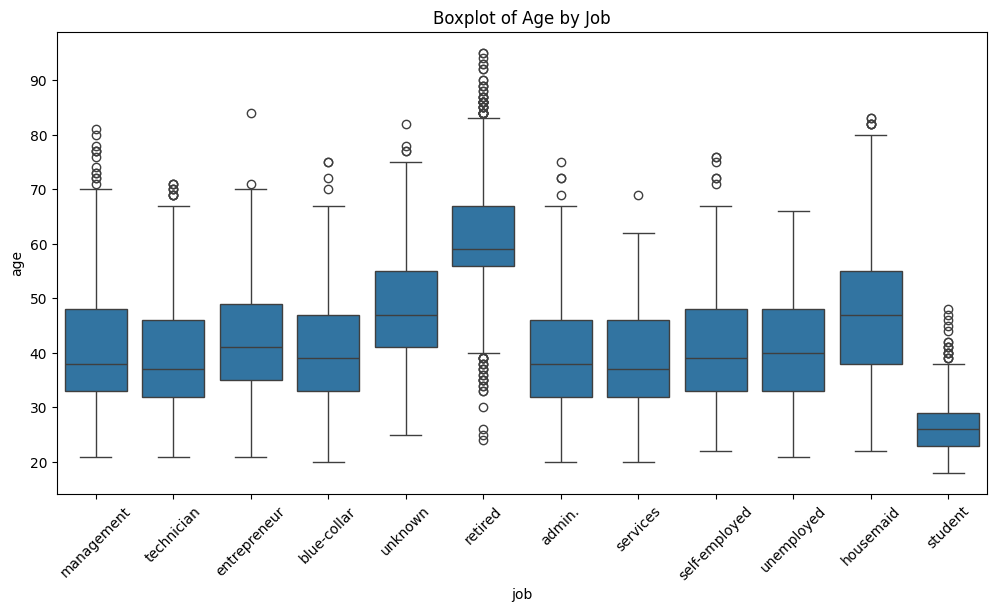

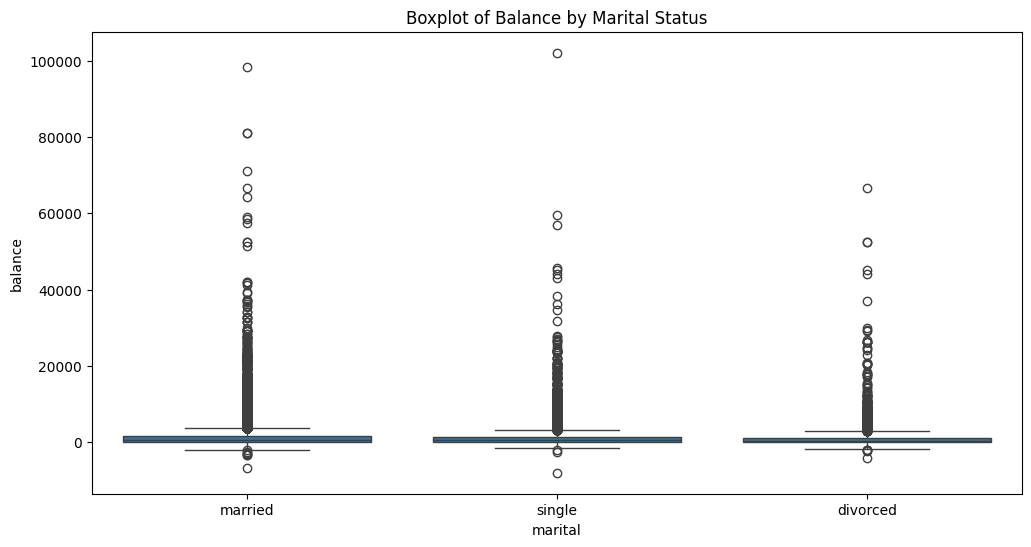

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='age', data=df)
plt.title("Boxplot of Age by Job")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='marital', y='balance', data=df)
plt.title("Boxplot of Balance by Marital Status")
plt.show()


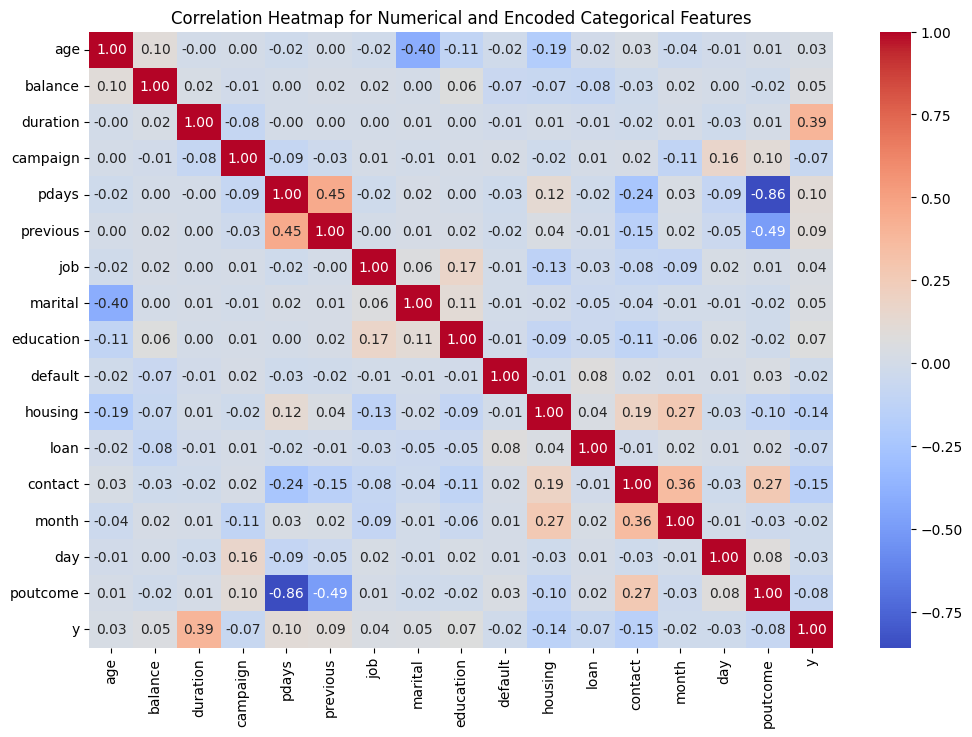

In [49]:
from sklearn.preprocessing import LabelEncoder

categorical_data = df[categorical_columns]
categorical_encoded = categorical_data.apply(LabelEncoder().fit_transform)

df_encoded = pd.concat([df[numeric_columns], categorical_encoded], axis=1)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for Numerical and Encoded Categorical Features')
plt.show()


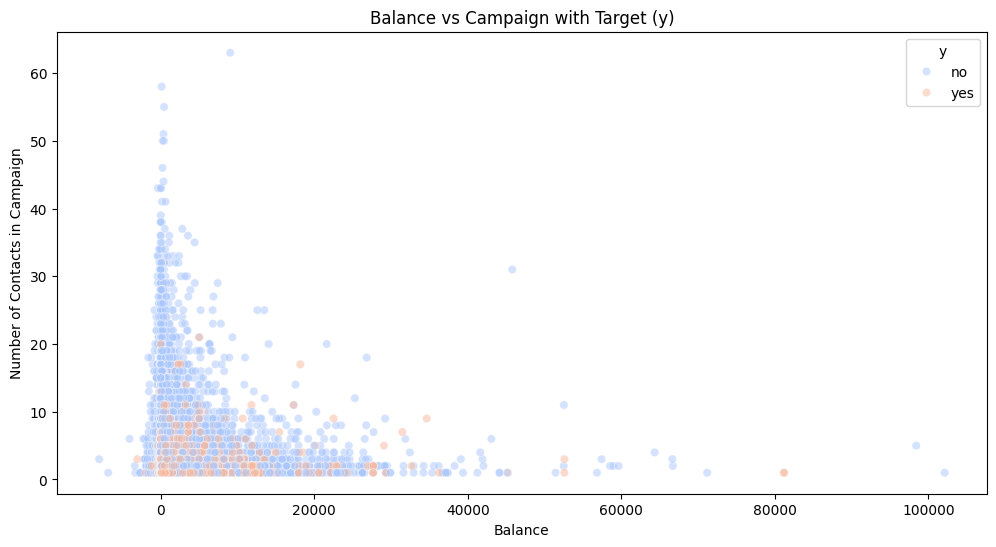

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='balance', y='campaign', hue='y', data=df, palette="coolwarm", alpha=0.5)
plt.title('Balance vs Campaign with Target (y)')
plt.xlabel('Balance')
plt.ylabel('Number of Contacts in Campaign')
plt.show()


### Addressing skewed distributions

Some classification models, perform better with Gaussian-distributed features due to their underlying assumptions. Additionally, feature scaling improves convergence for linear models, such as logistic regression.

Use the `PowerTransformer` from `sklearn` to normalize skewed numerical features and bring their distributions closer to normal. For features that already approximate a normal distribution, apply the `StandardScaler` to standardize their values to the same range. Visualize the results using a grid of histograms, showing the transformed distribution for each feature.

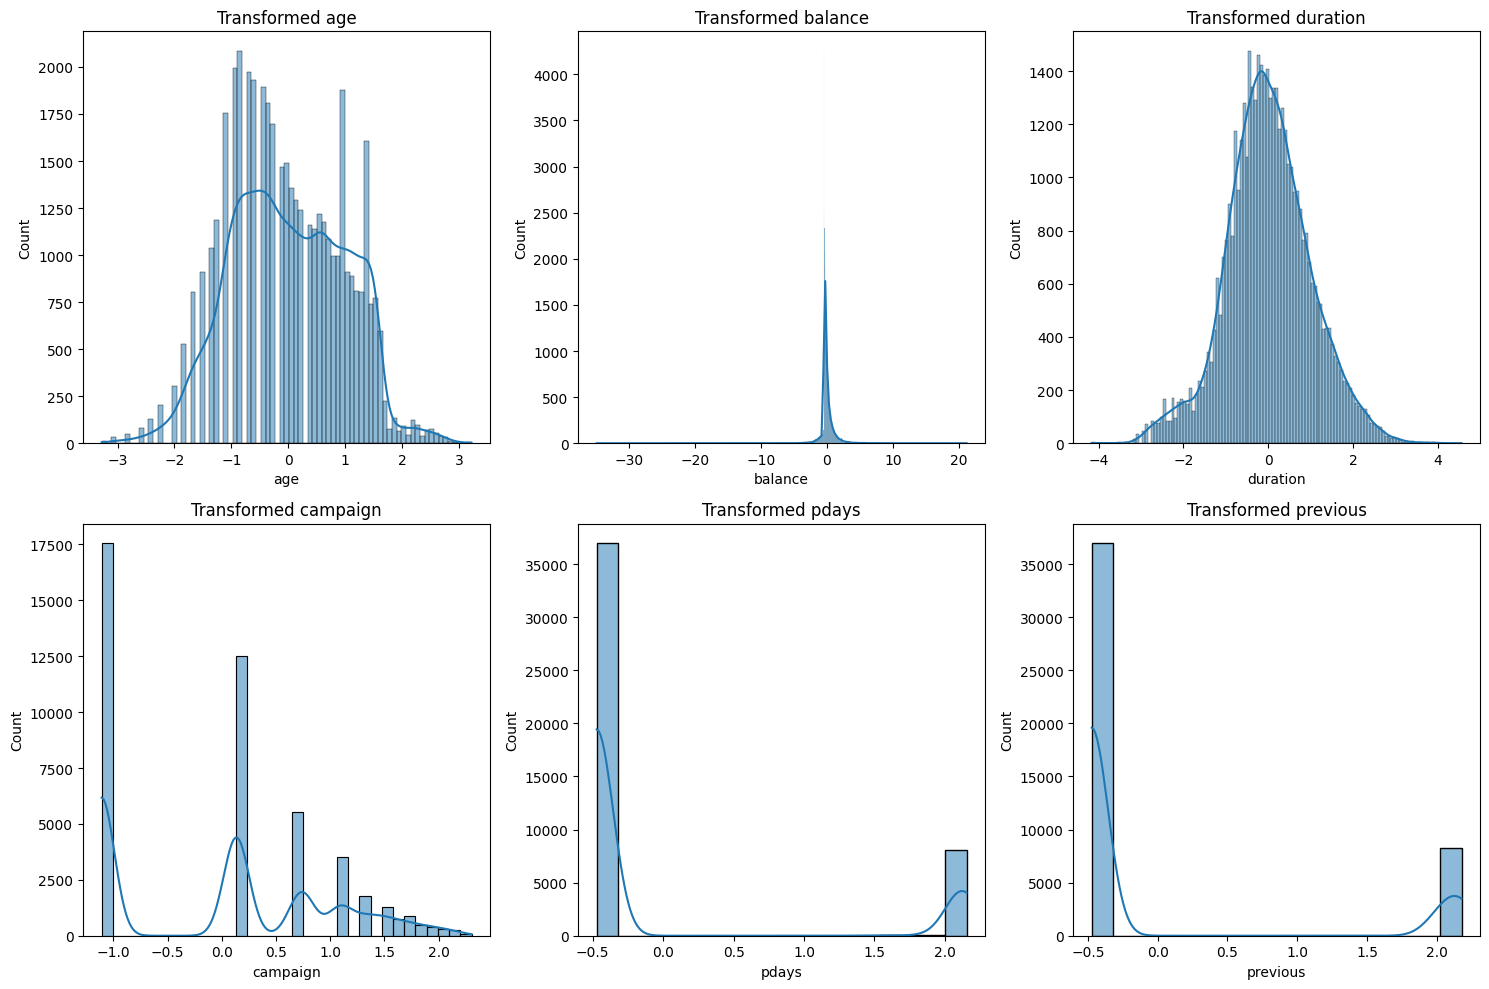

In [55]:

numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

transformed_features = pd.DataFrame(index=df.index)

for feature in numerical_features:
    skewness = df[feature].skew()
    
    if abs(skewness) > 0.5:  
        transformer = PowerTransformer()
        transformed_features[feature] = transformer.fit_transform(df[[feature]])
    else:  
        scaler = StandardScaler()
        transformed_features[feature] = scaler.fit_transform(df[[feature]])

plt.figure(figsize=(15, 10))
for i, feature in enumerate(transformed_features.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(transformed_features[feature], kde=True)
    plt.title(f"Transformed {feature}")
    plt.tight_layout()

plt.show()


Compare the distribution of numerical features after transformation with the initial ones (refere to previous histogram grid chart)

## Split the data and target encoding

Reload the original dataset to undo the transformations applied during EDA. Encode the target variable `y` into numeric representation (`no` to `0` , `yes` to `1`). Then slit the data into train, validation, and test sets with a 60%/20%/20% distribution with stratification by target (`stratify=y`), using `random_state=42` for `train_test_split` to ensure reproducibility.

X_train_val, X_test, y_train_val, y_test = ...

X_train, X_test, y_train, y_test = ...

In [62]:
# YOU CODE GOES HERE
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(path, sep=';')

df['y'] = df['y'].map({'no': 0, 'yes': 1})

X = df.drop(columns=['y'])
y = df['y']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)


## Feature Engineering

Based on the performed EDA, create an initial preprocessing pipeline for feature transformation. The pipeline should include the following steps:

- **Encoding Categorical Features:** Apply ordinal encoding or one-hot encoding to convert categorical variables into numerical format.
- **Feature Engineering:** Create new features based on insights from the EDA; apply transformations (e.g.: scaling) to existing features if needed
- **Feature Selection:** Remove redundant or irrelevant features, if consider needed (you can postpone this step to later, after fitting the model and analyzing feature importance)

At the end, you should have a pipeline object called `preprocessor` which you may use to fit and transform the data.

In [65]:
# YOU CODE GOES HERE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']  
ordinal_columns = ['education']  

numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']  

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
 
        ('ord', OrdinalEncoder(), ordinal_columns),

        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', PowerTransformer()) 
        ]), numerical_columns)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X = df.drop(columns='y')
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)



In [66]:
# YOU CODE GOES HERE

In [ ]:
# YOU CODE GOES HERE (feel free to add more cells if needed)

- Fit and Transform Training Data: Apply the `preprocessor` pipeline to fit and transform the training dataset.

- Transform Validation Data: Use the already fitted `preprocessor` pipeline to transform the validation dataset.

- Display Transformed DataFrames to ensure all transformations have been applied correctly.

In [68]:
# YOUR CODE GOES HERE
X_train_val_transformed = preprocessor.fit_transform(X_train_val)

transformed_column_names = (list(preprocessor.transformers_[0][1].get_feature_names_out(categorical_columns)) + 
                            ordinal_columns + 
                            numerical_columns)

X_train_val_transformed_df = pd.DataFrame(X_train_val_transformed, columns=transformed_column_names)

print("Transformed Training Data (First 5 rows):")
print(X_train_val_transformed_df.head())

X_test_transformed = preprocessor.transform(X_test)

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_column_names)

print("\nTransformed Validation Data (First 5 rows):")
print(X_test_transformed_df.head())


Transformed Training Data (First 5 rows):
   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0         0.0              0.0               0.0            0.0   
1         0.0              0.0               0.0            0.0   
2         0.0              0.0               0.0            0.0   
3         0.0              0.0               0.0            0.0   
4         0.0              0.0               0.0            0.0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0             0.0          0.0                0.0           0.0          0.0   
1             0.0          0.0                0.0           0.0          1.0   
2             0.0          0.0                0.0           0.0          0.0   
3             0.0          0.0                0.0           0.0          0.0   
4             0.0          0.0                0.0           0.0          0.0   

   job_technician  ...  poutcome_success  poutcome_unknown  education  \
0

### Logistic Regression Model

Combine preprocessing pipeline with logistic regression model into logistic_regression_pipeline object.

Use model initialization, use the following model parameters for beggining:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42, class_weight='balanced')

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Define the preprocessing steps (already included in your pipeline setup)

# Categorical features processing (one-hot encoding)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One hot encoding
])

# Ordinal features (impute if needed, then encode)
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('encoder', OrdinalEncoder())  # Ordinal encoding
])

# Numerical features scaling
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())  # Standard scaling
])

# Combined column transformer for all types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_pipeline, categorical_columns),
        ('ordinal', ordinal_pipeline, ordinal_columns),
        ('numerical', numerical_pipeline, numerical_columns)
    ]
)

# Initialize the logistic regression model with the given parameters
logistic_regression_model = LogisticRegression(
    solver='liblinear', C=1.0, max_iter=1000, random_state=42, class_weight='balanced'
)

# Combine the preprocessor with the logistic regression model into a single pipeline
logistic_regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', logistic_regression_model)  # Classification model
])

# Fit the pipeline to the training data
logistic_regression_pipeline.fit(X_train_val, y_train_val)

# Predict on the training set to check the pipeline
y_pred_train = logistic_regression_pipeline.predict(X_train_val)


Fit the model on training set and evaluate it's performance (accuracy, precision, recall, f1 score) on validation set.

In [71]:
# YOUR CODE GOES HERE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the logistic regression pipeline on the training data
logistic_regression_pipeline.fit(X_train_val, y_train_val)

# Predict on the validation set (X_test)
y_pred = logistic_regression_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8416
Precision: 0.4103
Recall: 0.8081
F1 Score: 0.5442


Is accuracy a good metric to assess the performance of the model on the current dataset? Explain your answer.

In [ ]:
# YOUR ANSWER GOES HERE
#Nu, acuratetea nu este cel mai bun metric pentru a evalua performanta modelului in acest caz.
# Clase dezechilibrate: o clasa este mult mai frecventa decat cealalta), acuratetea poate fi gresita. 
# De exemplu, daca clasa majoritara (de exemplu, "Nu") este mult mai frecventa, modelul ar putea prezice "Nu" 
# pentru majoritatea instantelor si tot ar obtine o acuratete mare, dar nu ar identifica corect cazurile din clasa minoritara (de exemplu, "Da").

Display the confusion matrix for the data from the validation set

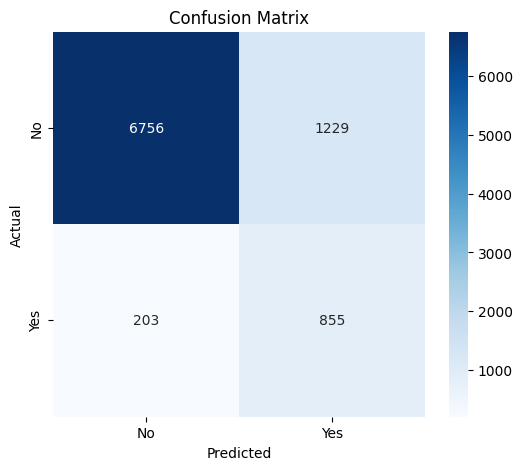

In [72]:
# YOUR CODE GOES HERE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


To obtain a more reliable estimate of the model's performance, apply stratified 5-fold cross-validation. For each fold, compute the **accuracy**, **precision**, **recall**, and **F1 score** to evaluate the model's effectiveness across multiple metrics.

Use the `X_train_val` and `y_train_val` datasets, derived during the data splitting phase, as inputs for the cross-validation process.

In [73]:
# YOU CODE GOES HERE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the list to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform stratified cross-validation
for train_idx, val_idx in cv.split(X_train_val, y_train_val):
    X_train_cv, X_val_cv = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
    y_train_cv, y_val_cv = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]
    
    # Fit the logistic regression pipeline
    logistic_regression_pipeline.fit(X_train_cv, y_train_cv)
    
    # Make predictions
    y_pred = logistic_regression_pipeline.predict(X_val_cv)
    
    # Compute evaluation metrics for each fold
    accuracy_scores.append(accuracy_score(y_val_cv, y_pred))
    precision_scores.append(precision_score(y_val_cv, y_pred))
    recall_scores.append(recall_score(y_val_cv, y_pred))
    f1_scores.append(f1_score(y_val_cv, y_pred))

# Calculate and display the average metrics across all folds
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Average Precision: {np.mean(precision_scores):.4f}")
print(f"Average Recall: {np.mean(recall_scores):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")


Average Accuracy: 0.8413
Average Precision: 0.4091
Average Recall: 0.8019
Average F1 Score: 0.5418


Compare the cross validation results with the results obtained from using single validation set. Do they differ? Why? Which score should better reflect  model performance better?

In [ ]:
# YOU ANSWER GOES HERE
# Diferente:
# Rezultatele sunt destul de apropiate, dar cross-validation ofera o estimare mai robusta a performantelor modelului, 
# intrucat se bazeaza pe mai multe subseturi ale datelor si ajuta la reducerea variabilitatii care ar putea aparea daca 
# am folosit doar un singur set de validare.
# Care metric este mai relevant:
# Cross-validation este o metoda mai fiabila, deoarece reflecta performanta modelului pe mai multe subseturi de date,
# reducand astfel riscul de a obtine un rezultat supraevaluat sau subevaluat pe un singur set de validare.

Use **GridSearchCV** to find the optimal value of the parameter `C` based on f1-score from the following list: `[0.01, 0.1, 1, 10, 100]`. Keep other params as before. Set f1 as scoring metric for GridSerachCV.

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the hyperparameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]  # Prefix 'classifier' to point to the LogisticRegression step in the pipeline
}

# Use GridSearchCV with F1 score as the evaluation metric
grid_search = GridSearchCV(
    logistic_regression_pipeline,
    param_grid,
    scoring=make_scorer(f1_score),
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Fit the GridSearchCV on training data
grid_search.fit(X_train_val, y_train_val)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display the results
print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'classifier__C': 1}
Best F1 Score: 0.5432249712369412


Which C parameter gives best f1-score?

In [ ]:
# YOU ANSWER GOES HERE
# classifier__C': 1

Extract the best estimator from GridSearchCV, using  grid_search_cv.best_estimator_. Use it to get final predictions on test data. Estimate the final f1 score on test data.

In [77]:
# YOUR ANSWER GOES HERE


### Random Forest Classifier

Combine preprocessing pipeline with random forest classifier model into rf_pipeline object.

Set class_weight='balanced'

In [81]:
# YOUR CODE GOES HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Initialize the Random Forest Classifier with class_weight='balanced'
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Combine the preprocessing steps with the Random Forest model in the pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing steps defined previously
    ('classifier', rf_model)         # Random Forest classifier
])


Fit the model on training set and evaluate it's performance (accuracy, precision, recall, f1 score) on validation set.

In [82]:
# YOUR CODE GOES HERE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the Random Forest model using the training data
rf_pipeline.fit(X_train_val, y_train_val)

# Make predictions on the validation set
y_pred_val = rf_pipeline.predict(X_val)

# Evaluate the performance of the model on the validation set
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9999
Precision: 1.0000
Recall: 0.9991
F1 Score: 0.9995


Use stratified 5-fold cross validation, for each fold, calculate precision, recall and f1 score

In [83]:
# YOU CODE GOES HERE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np

# Define stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define custom scoring function to calculate precision, recall, and F1 score
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation with Stratified KFold on the RF pipeline
cross_val_results = cross_val_score(rf_pipeline, X_train_val, y_train_val, cv=cv, scoring='f1')

# Calculate precision, recall, and f1 scores for each fold
precision_scores = cross_val_score(rf_pipeline, X_train_val, y_train_val, cv=cv, scoring='precision')
recall_scores = cross_val_score(rf_pipeline, X_train_val, y_train_val, cv=cv, scoring='recall')

# Calculate the average of each score
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(cross_val_results)

avg_precision, avg_recall, avg_f1


(np.float64(0.6719135270593695),
 np.float64(0.3074955132982212),
 np.float64(0.42182355822081624))

Use **RandomizedSearchCV** to optimize the parameters. Research recommended parameter ranges for random forest classifier online. Keep class_weight='balanced' param.

In [89]:
# YOU CODE GOES HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Define the Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the hyperparameter search space
param_dist = {
    'classifier__n_estimators': [100, 200, 300, 500, 1000],
    'classifier__max_features': ['auto', 'sqrt', 'log2', None],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4, 10],
    'classifier__bootstrap': [True, False]
}

# Prepare the pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),  # Assuming you have a defined preprocessor pipeline
    ('classifier', rf)
])

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline_rf,
    param_distributions=param_dist,
    n_iter=10,  # Number of random samples to test
    cv=5,  # Number of cross-validation folds
    scoring=make_scorer(f1_score),  # Use f1 score for evaluation
    verbose=1,  # Prints details during the execution
    random_state=42
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train_val, y_train_val)

# Output the best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the best estimator on the validation set
best_rf_model = random_search.best_estimator_

# Predictions and evaluation on the validation set
y_val_pred = best_rf_model.predict(X_test)
val_f1_score = f1_score(y_test, y_val_pred)

print("Validation F1 Score:", val_f1_score)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Cezar\anaconda3\envs\Excalibur\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Cezar\anaconda3\envs\Excalibur\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Cezar\anaconda3\envs\Excalibur\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Cezar\anaconda3\envs\Excalibur\Lib\site-packages\sklearn\

Best Parameters: {'classifier__n_estimators': 1000, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 20, 'classifier__bootstrap': False}
Validation F1 Score: 0.5943297164858243


Which params give the best score?

In [ ]:
# YOUR ANSWER HERE

Fit random forest model initialized with the best parameters obtained from the RandomizedSearchCV results on training set. Evaluate the model's performance by calculating its score on the validation set.

In [91]:
# YOUR CODE GOES HERE
# Use the best parameters found from RandomizedSearchCV
best_params = random_search.best_params_

# Initialize the RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(
    class_weight='balanced',  # Keep class_weight balanced
    n_estimators=best_params['classifier__n_estimators'],
    max_features=best_params['classifier__max_features'],
    max_depth=best_params['classifier__max_depth'],
    min_samples_split=best_params['classifier__min_samples_split'],
    min_samples_leaf=best_params['classifier__min_samples_leaf'],
    bootstrap=best_params['classifier__bootstrap'],
    random_state=42
)

# Fit the model on the training data (X_train_val and y_train_val)
rf_best.fit(X_train_val, y_train_val)

# Calculate the score (F1 score) on the validation set
y_val_pred = rf_best.predict(X_valid)

# Evaluate F1 score
from sklearn.metrics import f1_score

f1_val_score = f1_score(y_valid, y_val_pred)
print("F1 Score on Validation Set:", f1_val_score)

# Optionally, you can also calculate accuracy, precision, recall for more insights
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_valid, y_val_pred)
precision = precision_score(y_valid, y_val_pred)
recall = recall_score(y_valid, y_val_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


ValueError: could not convert string to float: 'technician'

Visualize the feature importances of the Random Forest model with a bar chart. Extract the importance scores from the fitted model's `feature_importances_` attribute to showcase the relative significance of each feature. To access the model object within the pipeline, use `rf_pipeline.named_steps['name_of_your_model_in_pipeline']`.

Keep in mind that the feature importance scores correspond to the columns of the processed features passed to the model. Refer to your data preprocessor to map these processed columns back to their feature names for clear interpretation.

In [ ]:
# YOU CODE GOES HERE

### XGBoost Classifier

Combine the preprocessing pipeline with the XGBoost classifier into a single `xgb_pipeline` object. Set the `scale_pos_weight` parameter in the XGBoost model based on the ratio of negative to positive class examples to enable cost-sensitive learning for handling class imbalance.

In [ ]:
# YOUR CODE GOES HERE

Use stratified 5-fold cross validation, for each fold, calculate precision, recall and f1 scorem

In [ ]:
# YOUR CODE GOES HERE

Use **Optuna** to optimize the model's hyperparameters. Research recommended parameter ranges and search spaces online to guide the optimization process. Perform 50 to 100 iterations to effectively explore the hyperparameter space.

In [ ]:
# YOUR CODE GOES HERE

Which params give the best score?

In [ ]:
# YOU ANSWER HERE

Visualize the feature importances of the XGBoost model using a bar chart. Extract the importances from the fitted model's `feature_importances_` attribute to showcase the relative contribution of each feature. (hint: If you used a pipeline, you can extract the model from it by ...)

In [ ]:
# YOU CODE GOES HERE

Which of the model parameters provided the best cross validation score?

In [ ]:
# YOUR ANSWER GOES HERE

## Iterative Improvement

At this stage, you are encouraged to revisit the feature engineering phase and refine the transformation pipeline. Consider removing features that are not important, adding new transformations, or modifying existing ones based on insights or cross-validation results.

Remember, building an effective model is an iterative process. Document your observations below, including which modifications improved or did not improve the cross-validation score. Note that some transformations make work better with linear models (logistic regression), while other are more suitable for tree-based models.

In [ ]:
# YOUR OBSERVATIONS GO HERE

## Model Interpretation

For the model with the best cross-validation score, compute the following to analyze feature importance and model behavior:

- **Permutation Feature Importance** to evaluate the impact of each feature on model performance.
- **Partial Dependence Plots (PDP)** for each numeric feature to visualize the relationship between the feature and the target variable.
- **SHAP (SHapley Additive exPlanations) Values**: Explain model predictions with both local and global interpretability charts. Local interpretability focuses on individual predictions, while global interpretability provides an overall understanding of feature contributions. Use waterfall chart from shap library for explaining individual predictions. Use beeswarm and bar chart for global interpretability using shap values.

In [ ]:
# YOUR CODE GOES HERE

Which features has the biggest influence on target variable?

Explain the relationship of the features and target.

In [ ]:
# YOUR ANSWER GOES HERE

## Balancing Data

So far, you have addressed the issue of imbalanced data by employing cost-sensitive learning. This was done by setting the `class_weight` parameter to `"balanced"` for logistic regression and random forest, and using the `scale_pos_weight` parameter for the XGBoost classifier, which automatically adjusts weights to prioritize the minority class during training.

Apply two of the studied undersampling methods using **Imbalanced-learn** library, retaining previous transformations. Use the best model identified earlier for predictions with the undersampled data. For each undersampling method, use cross validation by fitting the best model identifying at previous step and compare the scores

In [ ]:
# YOU CODE GOES HERE

Did undesampling improve f1 score? What about precision and recall?

In [ ]:
# YOU ANSWER HERE

Apply two of the studied oversampling methods using **Imbalanced-learn**, retaining previous transformations. Use the best model identified earlier for predictions with the undersampled data. For each undersampling method, use cross validation by fitting the best model identifying at previous step and compare the scores

In [ ]:
# YOUR CODE GOES HERE

Did oversampling improve f1 score? What about precision and recall?

In [ ]:
# YOU ANSWER HERE

Which method was most effective for handling imbalanced classification in this dataset: cost-sensitive learning, undersampling, or oversampling?

In [ ]:
# YOU ANSWER HERE

## Final Evaluation

Evaluate your best model on the test data, for final score reporting

In [ ]:
# YOUR CODE GOES HERE